# Avaliação de Agrupamentos

Fontes da aula de hoje:
1. Capítulo 17 do *Livro Data Mining and Machine Learning: Fundamental Concepts and Algorithms* (https://dataminingbook.info/book_html/)

2. Artigo científico *A Tutorial on Spectral Clustering* (https://arxiv.org/pdf/0711.0189.pdf)

3. Várias páginas da documentação da ``scikit-learn``

4. Material de aula do Professor Mark Crovella (https://github.com/mcrovella/CS506-Computational-Tools-for-Data-Science/blob/master/07-Clustering-II-in-practice.ipynb)

## O Problema de agrupamento

Dada uma coleção de objetos $X = \{x_1, x_2, \dots, x_n\}$, o objetivo é dividir os elementos de $X$ em grupos de forma que:
1. Elementos do mesmo grupo **sejam** "similares"
2. Elementos de grupos diferentes **não sejam** "similares"

Exitem vários paradigmas e algoritmos de agrupamento. Nós vimos apenas 3:
- $k$-means
- Agrupamento Hierárquico
- Agrupamento Espectral

Outras abordagens **básicas** (que não veremos por questão de tempo) são:
- GMM (https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html)
- DBSCAN (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

# Perguntas de hoje

1. Como escolher um bom número de grupos?
2. Como avaliar um agrupamento?

# Parte I: Algumas visualizações interessantes

Vamos começar com um dataset sintético de exemplo. A biblioteca ``scikit-learn`` tem várias classes úteis para gerar datasets.

No exemplo abaixo, geramos 100 pontos, cada um no espaço de 30 dimensões. Os pontos estão concentrados em três grupos diferentes. A estrutura de "grupos" é conhecida e retornada na variável ``y``.

In [ ]:
import sklearn.datasets as sk_data
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=30, center_box=(-10.0, 10.0), random_state=0)

In [ ]:
X.shape

(100, 30)

In [ ]:
X

array([[ 0.76932537,  3.62569187,  2.80925899, ...,  8.23276975,
         0.64681591, -2.9473858 ],
       [-6.4446809 , -8.70609169,  3.93633252, ..., -7.54857643,
         0.65771436,  8.07632882],
       [-6.34769507,  4.75136098,  1.27258118, ..., -5.10636874,
         0.05656725, -4.00690969],
       ...,
       [-5.49981394, -9.08449843,  2.6079131 , ..., -6.16162778,
         2.46124422,  6.58079852],
       [-6.41629398, -7.2881536 ,  1.98261109, ..., -8.41378399,
         3.21627639,  8.01932093],
       [-5.00936654,  5.12964506, -2.76935525, ..., -4.31770864,
        -0.13718802, -4.7067927 ]])

In [ ]:
y

array([0, 2, 1, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 0, 2, 1, 1, 0, 1, 2, 1, 2,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 0, 1,
       0, 1, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 0, 2,
       1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0,
       0, 1, 0, 2, 2, 1, 0, 1, 1, 2, 2, 1])

## Matriz de distâncias

Uma inspeção visual interessante é observar o impacto do (de um) algoritmo de agrupamento na matriz de distâncias dos dados.

Isso faz sentido para todos os algoritmos de agrupamento? **Não**, mas é uma ferramenta interessante para, por exemplo, o $k$-means.

In [ ]:
import sklearn.metrics as metrics
euclidean_dists = metrics.euclidean_distances(X)
euclidean_dists

array([[ 0.        , 47.73797008, 45.18787978, ..., 47.87535624,
        49.64694402, 45.58307694],
       [47.73797008,  0.        , 43.66760596, ...,  7.3768511 ,
         7.36794305, 43.51069074],
       [45.18787978, 43.66760596,  0.        , ..., 42.55609472,
        43.80829605,  9.31642449],
       ...,
       [47.87535624,  7.3768511 , 42.55609472, ...,  0.        ,
         8.19377462, 41.81523421],
       [49.64694402,  7.36794305, 43.80829605, ...,  8.19377462,
         0.        , 43.41205895],
       [45.58307694, 43.51069074,  9.31642449, ..., 41.81523421,
        43.41205895,  0.        ]])

A matriz de distâncias é dada pela figura abaixo.

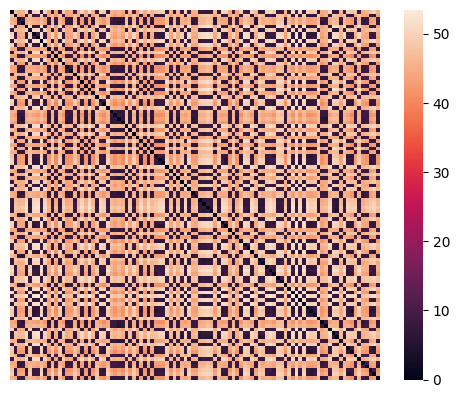

In [ ]:
import seaborn as sns
sns.heatmap(euclidean_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True );

Vamos aplicar o $k$-means.

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
kmeans.fit(X);

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Vamos reorganizar as linhas e colunas da matriz de distâncias de acordo com o resultado do algoritmo de agrupamento.

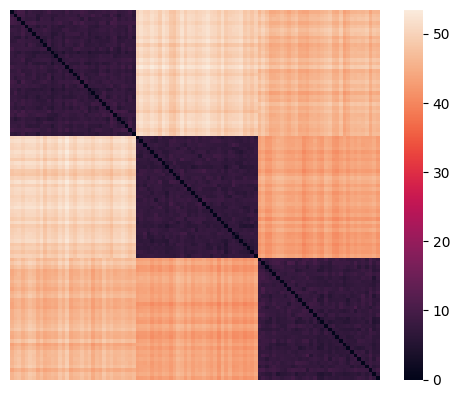

In [ ]:
import numpy as np
labels = kmeans.labels_
idx = np.argsort(labels)
rearranged_dists = euclidean_dists[idx,:][:,idx]
sns.heatmap(rearranged_dists, xticklabels = False, yticklabels = False, linewidths = 0, square = True);

Veja que a nova ordenação da matriz de distâncias expõe claramente a estrutura de grupos dos dados, indicando que o algoritmo fez um "bom trabalho".

## Dendrogramas

Como vimos na aula de agrupamento hierárquico, **dendrogramas** são excelentes ferramentas para visualizar/buscar a estrutura de grupos em um conjunto de dados.

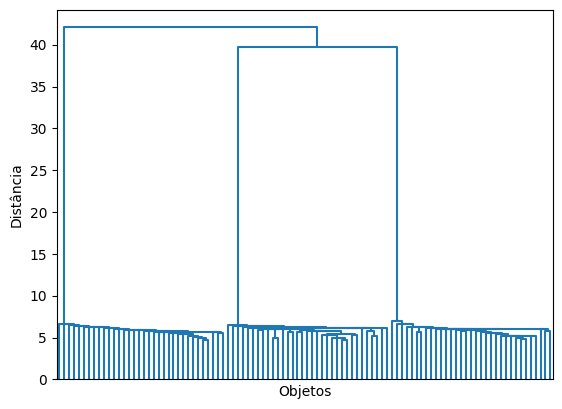

In [ ]:
#@title
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
import itertools

Z = []
n, d = X.shape
for a, b in itertools.combinations(X, 2):
  Z.append(np.linalg.norm(a - b))
Z = hierarchy.linkage(Z)
hierarchy.dendrogram(Z, color_threshold=1)
plt.xticks([], [])
plt.ylabel('Distância')
plt.xlabel('Objetos');

## *Cluster Map*

*Why not both?*

*Cluster Map* da biblioteca ``seaborn`` reorganiza as linhas (objetos) e as colunas (*features*) da matriz de dados.

Além disso, dendrogramas são adicionados para "explicar" a ordem escolhida.

Assim, é possíve observar:
1. A estrutura de grupos (com as limitações de um dendrograma);
2. A similaridade entre as *features*

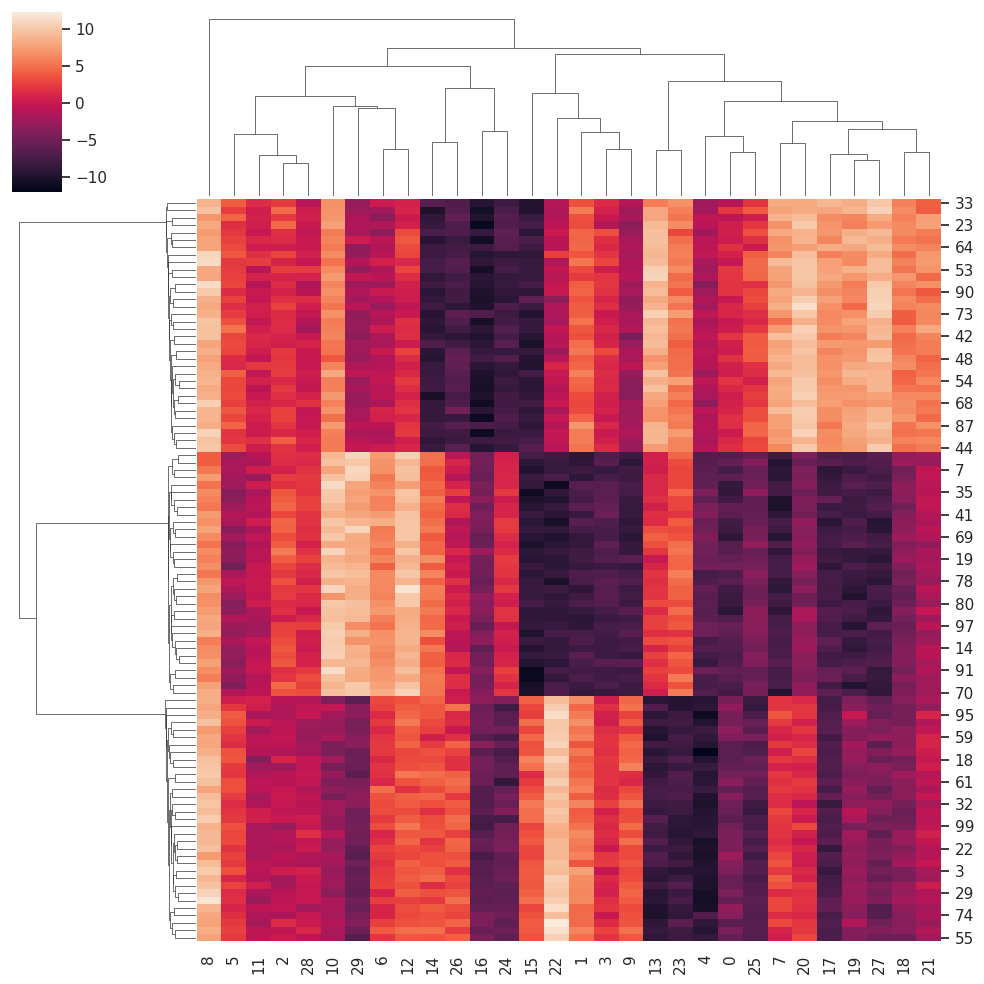

In [ ]:
import seaborn as sns; sns.set_theme(color_codes=True)
g = sns.clustermap(X)

### Exemplo (Preferências por disciplinas no DI)

Os nomes dos professores e das disciplinas foram removidos por questões de privacidade.

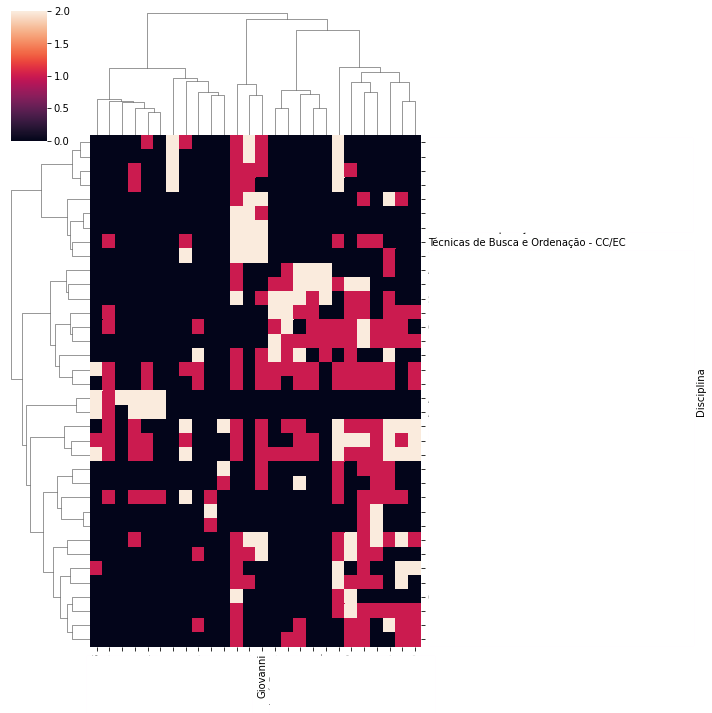

## PCA

Podemos utilizar PCA para projetar os dados em duas/três dimensões. Ao fazer isso, é importante ficarmos atentos à quantidade de variância capturada nas primeiras componentes principais.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(X);

print(pca.explained_variance_ratio_);

[0.56663546 0.39862766]


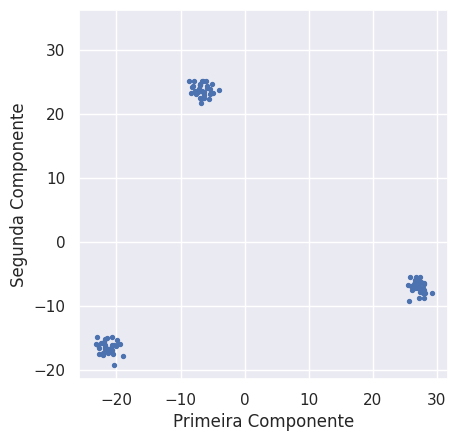

In [ ]:
U = pca.transform(X)
plt.scatter(U[:, 0], U[:, 1], s = 8)
plt.axis('square');
plt.xlabel('Primeira Componente');
plt.ylabel('Segunda Componente');

## *Multidimensional Scaling* (MDS)

Uma visualização alternativa é utilizar MDS.

A ideia de MDS é projetar os dados no plano (pode ser usado em dimensões mais altas) de forma que as **distâncias** entre os pontos no espaço projetado sejam similares às distâncias no espaço original.

Uma projeção de qualidade nem sempre é possível!!! Por exemplo, pense em um conjunto de pontos distribuídos na superfície de uma esfera.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


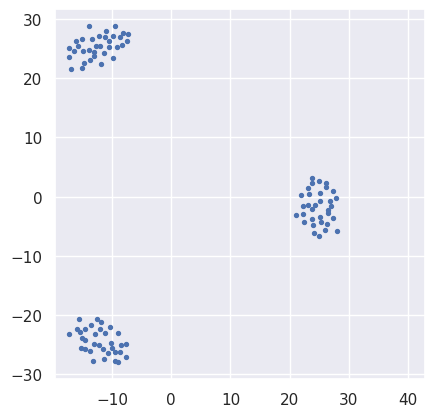

In [ ]:
import sklearn.manifold
mds = sklearn.manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity = "precomputed", n_jobs = 1)
fit = mds.fit(euclidean_dists)
pos = fit.embedding_
plt.scatter(pos[:, 0], pos[:, 1], s=8)
plt.axis('square');

# Parte II: Medidas externas

Seja $X = \{x_1, x_2, \dots, x_n\}$ um conjunto de pontos que temos interesse em agrupar (i.e., aplicar um algoritmo de agrupamento).

Um algoritmo $A_1$ é utilizado e obtemos um agrupamento $C = \{C_1, C_2, \dots, C_k\}$. Considere os dois seguintes cenários distintos:

1. Um outro algoritmo, $A_2$, é utilizado e obtemos um agrupamento $T = \{T_1, T_2, \dots, T_l\}$. **Os agrupamentos $C$ e $T$ são similares?**

2. A estrutura de grupos **real** dos dados é conhecida. Nesse caso, sabe-se que os dados estão divididos nos conjunto de grupos $T = \{T_1, T_2, \dots, T_l\}$. **O agrupamento $C$ está próximo de $T$?**

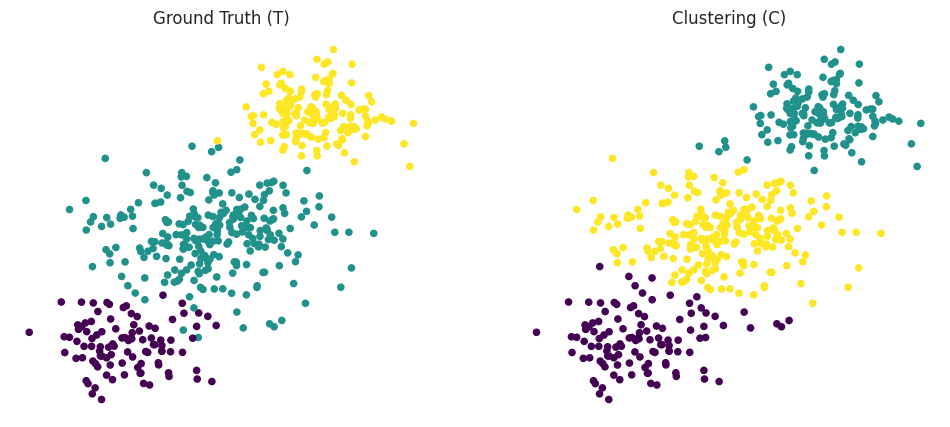

In [ ]:
#@title
import pandas as pd

X_rand, y_rand = sk_data.make_blobs(n_samples=[100, 250, 150], centers = [[1, 2],[1.5, 3], [2, 4]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.2, .3, .2], random_state = 0)
df_rand_gt = pd.DataFrame(np.column_stack([X_rand[:, 0], X_rand[:, 1], y_rand]), columns = ['X', 'Y', 'label'])
df_rand_clust = df_rand_gt.copy()
kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 100)
df_rand_clust['label'] = kmeans.fit_predict(df_rand_gt[['X', 'Y']])

figs, axs = plt.subplots(1, 2, figsize = (12, 5))
df_rand_gt.plot('X', 'Y', kind = 'scatter', c = 'label', colormap='viridis', ax = axs[0],
                   colorbar = False)
axs[0].set_title('Ground Truth (T)')
axs[0].set_axis_off()
df_rand_clust.plot('X', 'Y', kind = 'scatter', c = 'label', colormap='viridis', ax = axs[1],
                  colorbar = False)
axs[1].set_title('Clustering (C)')
axs[1].set_axis_off();

Para comparar um agrupamento $C$ com uma referência $T$, utilizamos medidas externas. Como sempre, há vários tipos. Vamos utilizar medidas baseadas em **concordâncias**.

Notação:
1. $C(x)$ é o **rótulo** do grupo a que $x$ pertence no agrupamento $C$
2. $T(x)$ é o **rótulo** do grupo a que $x$ pertence no agrupamento $T$

Vamos começar com algumas definições. Para cada $x$, $y$ pertencentes ao conjunto de dados $X$ (assumindo $x \neq y$), considere:
1. $TP = |\{(x, y): C(x) = C(y) \text{ e } T(x) = T(y)\}|$
2. $FP = |\{(x, y): C(x) = C(y) \text{ e } T(x) \neq T(y)\}|$
3. $TN = |\{(x, y): C(x) \neq C(y) \text{ e } T(x) \neq T(y)\}|$
4. $FN = |\{(x, y): C(x) \neq C(y) \text{ e } T(x) = T(y)\}|$

Em palavras:
1. $TP$ é o número de pares de pontos que estão no mesmo grupo em $C$ e em $T$;
2. $FP$ é o número de pares de pontos que estão no mesmo grupo em $C$, mas estão em grupos diferentes em $T$
3. $TN$ é o número de pares de pontos que estão em grupos diferentes em $C$ e em $T$
4. $FN$ é o número de pares de pontos que estão em grupos diferentes em $C$, mas estão no mesmo grupo em $T$.

### *Rand Index*

Computa a fração de pares de pontos que **concordam** com respeito a ambos agrupamentos.

$$Rand = \frac{TP + TN}{\binom{n}{2}}.$$

Se $C$ e $T$ são iguais, então $Rand = 1$. Valores próximos de 0 indicam forte discordância entre os agrupamentos.

Abaixo, fazemos uma análise do desempenho do $k$-means quando variamos o número de grupos. Veja que para três grupos, o algoritmo encontra a solução correta.

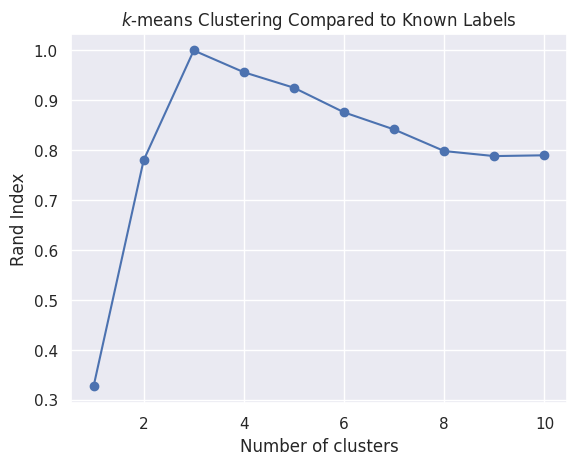

In [ ]:
#@title

from sklearn.metrics.cluster import rand_score

def ri_evaluate_clusters(X,max_clusters,ground_truth):
    ri = np.zeros(max_clusters+1)
    ri[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        ri[k] = rand_score(kmeans.labels_, ground_truth)
    return ri

ri = ri_evaluate_clusters(X, 10, y)
plt.plot(range(1,len(ri)), ri[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title('$k$-means Clustering Compared to Known Labels')
plt.ylabel('Rand Index');

Na prática, é comum utlizar o *Adjusted Rand Index*. Não veremos hoje, mas detalhes podem ser encontrados em https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html.

### *Fowlkes-Mallows Index*

Definido da seguinte forma:

$$FMI = \frac{TP}{\sqrt{(TP + FN)(TP + FP)}}.$$

A ideia é que o $FMI$ vai ter valor 1 quando não houver **falso-negativo** nem **falso-positivos**.

Veja que o $FMI$ ignora os **verdadeiro-negativos**, sendo assim uma medida assimétrica.

Também está disponível na ``scikit-learn`` (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fowlkes_mallows_score.html).



# Parte III: Medidas internas

Nesta parte da aula, estamos interessados em um outro cenário.

Seja $X = \{x_1, x_2, \dots, x_n\}$ um conjunto de pontos que temos interesse em agrupar (i.e., aplicar um algoritmo de agrupamento).

Um algoritmo $A_1$ é utilizado e obtemos um agrupamento $C = \{C_1, C_2, \dots, C_k\}$. **$C$ é um bom agrupamento?**

Essa é uma pergunta difícil de responder. Em geral, cada algoritmo ou paradigma de algoritmo de agrupamento precisa de uma estratégia diferente.

Neste contexto, medidas internas tentam avaliar/validar um agrupamento utilizando apenas **informações do próprio conjunto de dados**.

### Algoritmos baseados em distâncias e particionamento

Uma forma popular de quantificar a qualidade de um agrupamento é o **coeficiente de silhueta**. A ideia é que esta medida mede a **coesão** de cada grupo e também a **separação** entre os grupos.

Vamos, **cuidadosamente** definir algumas quantidades.

1. $\mathbf{\mu}_{out}^{min}(x_i)$: denota, para um elemento $x_i$, a média das distâncias entre $x_i$ e os elementos do *cluster* mais próximo. Assim:

$$\mathbf{\mu}_{out}^{min}(x_i) = \min_{j \neq C(x_i)}
\left\{
  \frac{\sum_{x \in C_j}d(x_i, x)}{|C_j|}
\right\}.
$$

2. $\mathbf{\mu}_{in}(x_i)$: denota a distância média de $x_i$ para os pontos pertencentes ao mesmo *cluster*. Assim:

$$\mathbf{\mu}_{in}(x_i) = \frac{\sum_{\{x \neq x_i: C(x) = C(x_i)\}}d(x, x_i)}{\text{Número de elementos no grupo de } x_i - 1}$$

3. Para cada $x_i$, do conjunto de dados, calcule a **silhueta** de $x_i$, dada por
$$s_i = \frac{\mathbf{\mu}_{out}^{min}(x_i) - \mathbf{\mu}_{in}(x_i)}{\max\{\mathbf{\mu}_{out}^{min}(x_i), \mathbf{\mu}_{in}(x_i)\}}.$$
Veja que se $s_i$ é próximo de 1, então o ponto $x_i$ está longe dos pontos dos outros grupos e está próximo dos pontos do próprio grupo. Ou seja, **$x_i$ está bem agrupado!**

4. Por fim, o **coeficiente de silhueta** agrega todos os valores de $s_i$
$$SC = \frac{1}{n}\sum_{i = 1}^ns_i$$

O coeficiente de silhueta está disponível na ``scikit-learn`` (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Veremos exemplos a seguir.

### Agrupamento Espectral

Na aula passada, foi mencionado que o agrupamento espectral possui a desvantagem de ser difícil de avaliar/validar. De fato, técnicas como o coeficiente de silhueta podem não funcionar bem, uma vez que o agrupamento espectral pode encontrar grupos não regulares ou não convexos.

No entanto, há outras maneiras para abordar o problema.

Da aula passada, temos que, o agrupamento espectral segue os eguintes passos (**versão resumida**):
1. Dado um grafo $G$ e um inteiro $k$, compute a matriz Laplaciana $L$;
2. Obtenha os $k$ autovetores associados aos menores autovalores de $L$. Denote esses vetores por $\mathbf{u}_1, \dots, \mathbf{u}_k$;
3. Construa a matriz $\mathbf{U}$, cujas colunas são $\mathbf{u}_1, \dots, \mathbf{u}_k$;
4. Aplique algum algoritmo de agrupamento já conhecido (e.g., $k$-means) na matriz $\mathbf{U}$. Os índices das linhas pertencentes aos mesmos grupos definem os índices dos vértices pertencentes às mesmas comunidades.

Denote os autovalores de $L$ por $\sigma_1 \le \sigma_2 \le \dots \le \sigma_n$.

Após isso, calcule o índice abaixo

$$\text{eigengap} = |\sigma_k - \sigma_{k+1}|.$$

Quanto maior for o valor de *eigengap*, mais rápido o algoritmo vai convergir e melhor é a qualidade do agrupamento.

**PS:** estamos sem as ferramentas nesta disciplina para prover uma intuição sobre este fato.

**PS2:** como mencionado na aula passada, em geral, o agrupamento espectral é feito sobre a Laplaciana Normalizada (e não a Laplacina, como exemplifiquei). A intuição é a mesma, mas o exemplo que mostrarei a diante usará a versão normalizada da matriz Laplaciana.

# Parte IV: Medidas/Metodologias relativas

Nesta parte da aula, estamos interessados em um outro cenário.

Seja $X = \{x_1, x_2, \dots, x_n\}$ um conjunto de pontos que temos interesse em agrupar (i.e., aplicar um algoritmo de agrupamento).

Temos interesse em usar um algoritmo $A_1$ para agrupar os dados em $X$. No entanto, $A_1$ depende de alguns hiperparâmetros (e.g., o número de grupos). **Como podemos escolher um bom conjunto de hiperparâmetros?**

Novamente, essa é uma pergunta difícil de responder. Em geral, cada algoritmo ou paradigma de algoritmo de agrupamento precisa de uma estratégia diferente.

A ideia básica é utilizar **medidas internas** para vários valores dos hiperparâmetros de interesse e observar a mudança da "qualidade" do agrupamento em função dos valores escolhidos.

### Exemplo I: Escolhendo o número de grupos para o $k$-means

Como vimos na aula passada, o problema $k$-means pode ser formulado como a seguir.

Dada uma matriz $\mathbf{X} \in \mathbb{R}^{n \times d}$, cujas linhas são denotadas por $\mathbf{x}_1, \dots, \mathbf{x}_n$, e um inteiro $k$, o objetivo é encontrar $k$ pontos, $\mathbf{c}_1, \dots, \mathbf{c}_k$, de forma que a seguinte quantidade seja minimizada:

\begin{equation}
\sum_{i = 1}^n \min_{1 \le j \le k} ||\mathbf{x}_i - \mathbf{c}_j||_2^2
\end{equation}

#### Inércia

Em muitos textos, o valor da quantidade acima é denotado por **inércia**. Uma metodologia comum para definir o valor de $k$ é observar o decaimento da inércia quando aumentamos o número de grupos. Quando a inércia parar de cair significativamente, há uma indicação que o número de grupos não deve ser mais aumentando.

In [ ]:
error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init = 10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

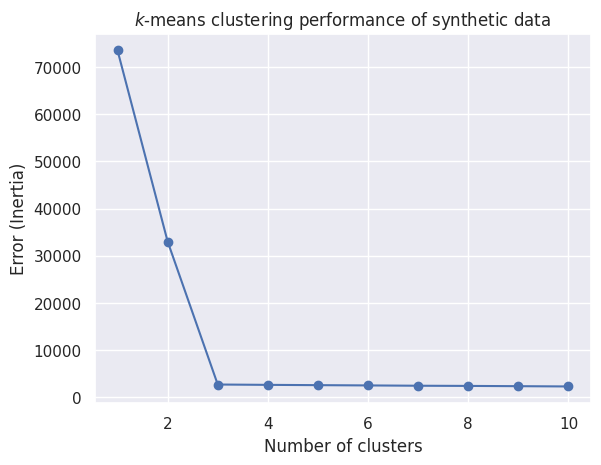

In [ ]:
plt.plot(range(1, len(error)), error[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title(r'$k$-means clustering performance of synthetic data')
plt.ylabel('Error (Inertia)');

**WARNING:** Na prática, nunca é tão bonito assim!

#### Coeficiente de silhueta (versão 1)

Podemos fazer o mesmo tipo de análise para o coeficiente de silhueta.
Vamos calcular o valor de $SC$ para vários valores de $k$. Assim, podemos procurar um valor de $k$ que origine um valor alto para $SC$.

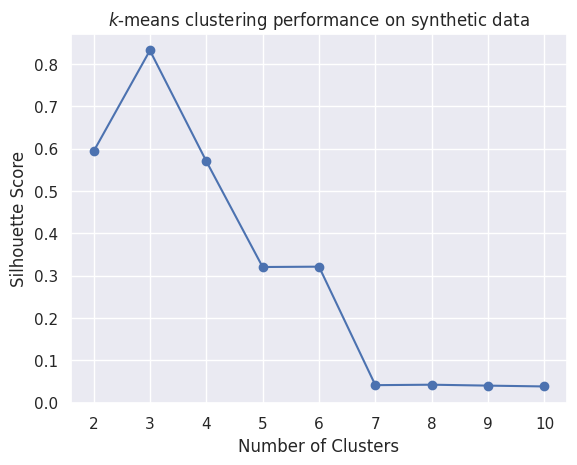

In [ ]:
def sc_evaluate_clusters(X, max_clusters, n_init, seed):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2, max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters = k, n_init = n_init, random_state = seed)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    return s

s = sc_evaluate_clusters(X, 10, 10, 1)
plt.plot(range(2, len(s)), s[2:], 'o-')
plt.xlabel('Number of Clusters')
plt.title('$k$-means clustering performance on synthetic data')
plt.ylabel('Silhouette Score');

#### Coeficiente de silhueta (versão 2)

Uma alternativa ao cálculo da média dos valores de $s_i$ é observar a distribuição desses valores para vários $k$'s.

A biblioteca ``scikit-learn`` agrega essa análise em um tipo de gráfico bem informativo.

O código/análise abaixo é retirado (copiado) de https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


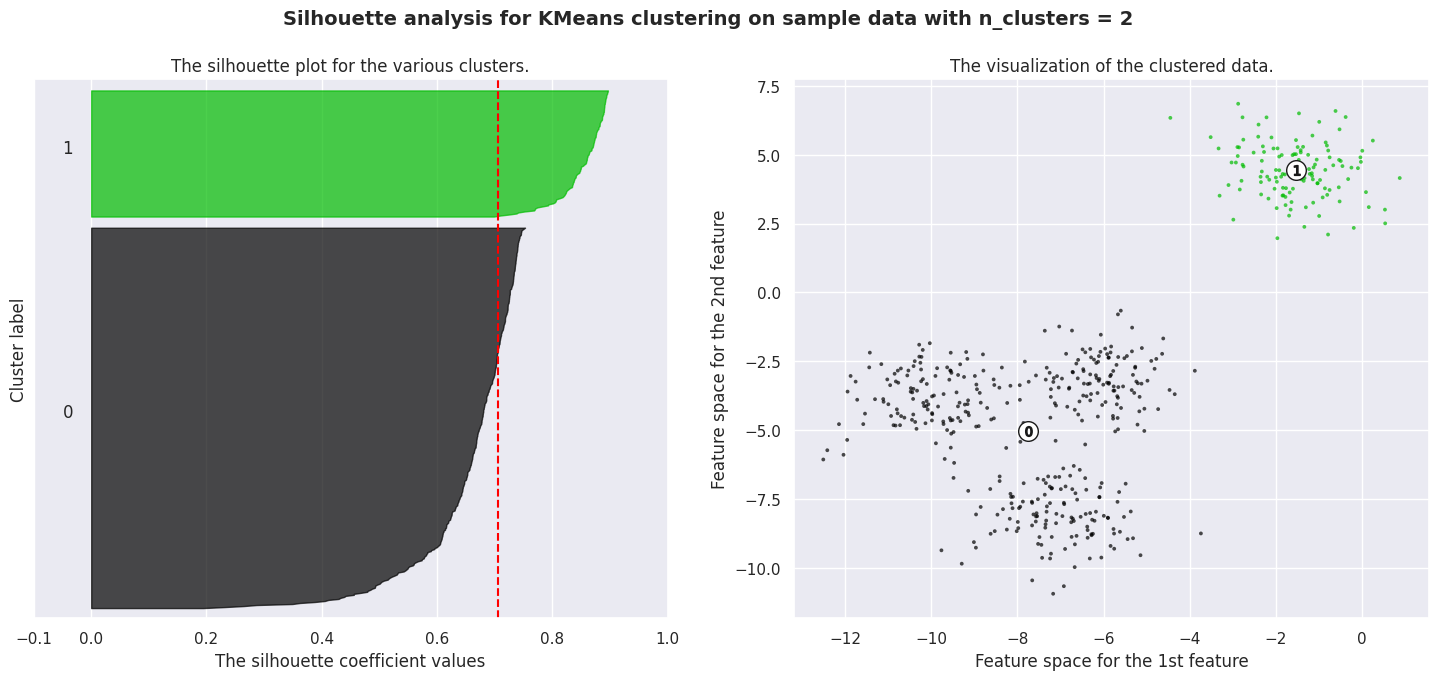

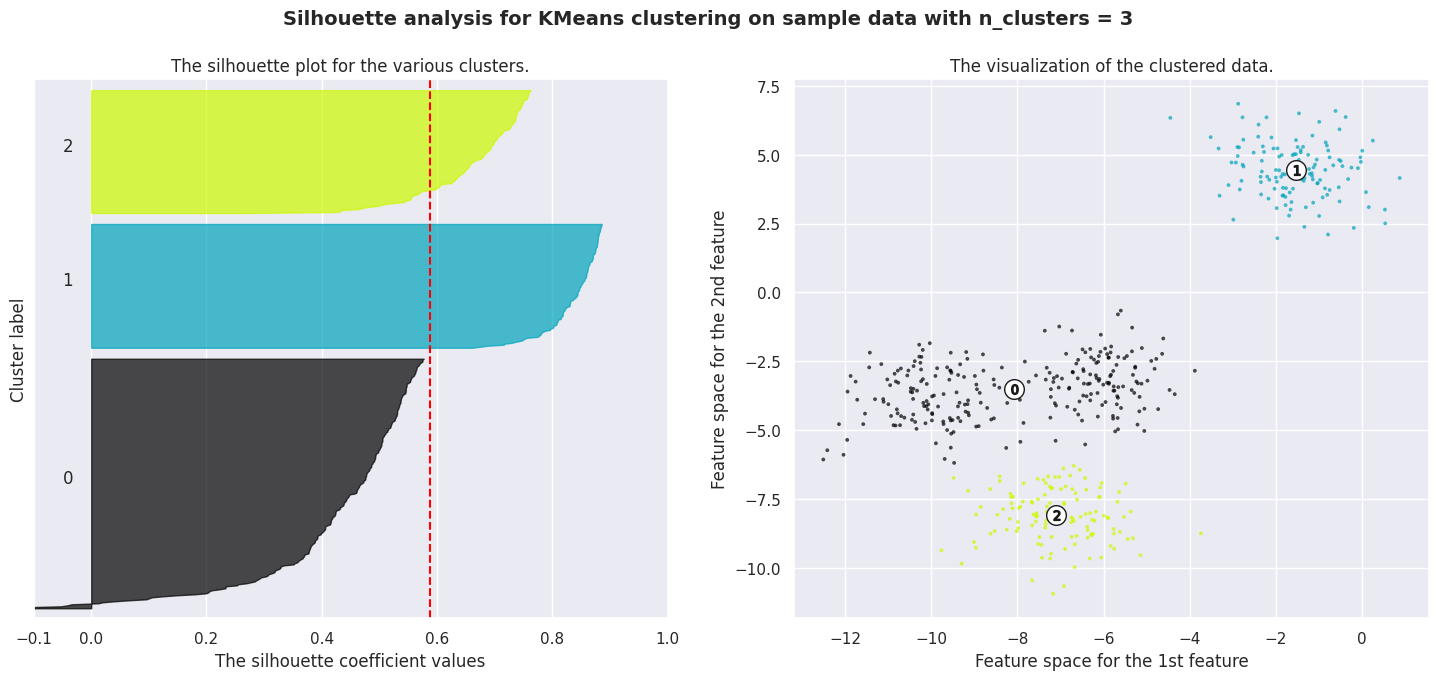

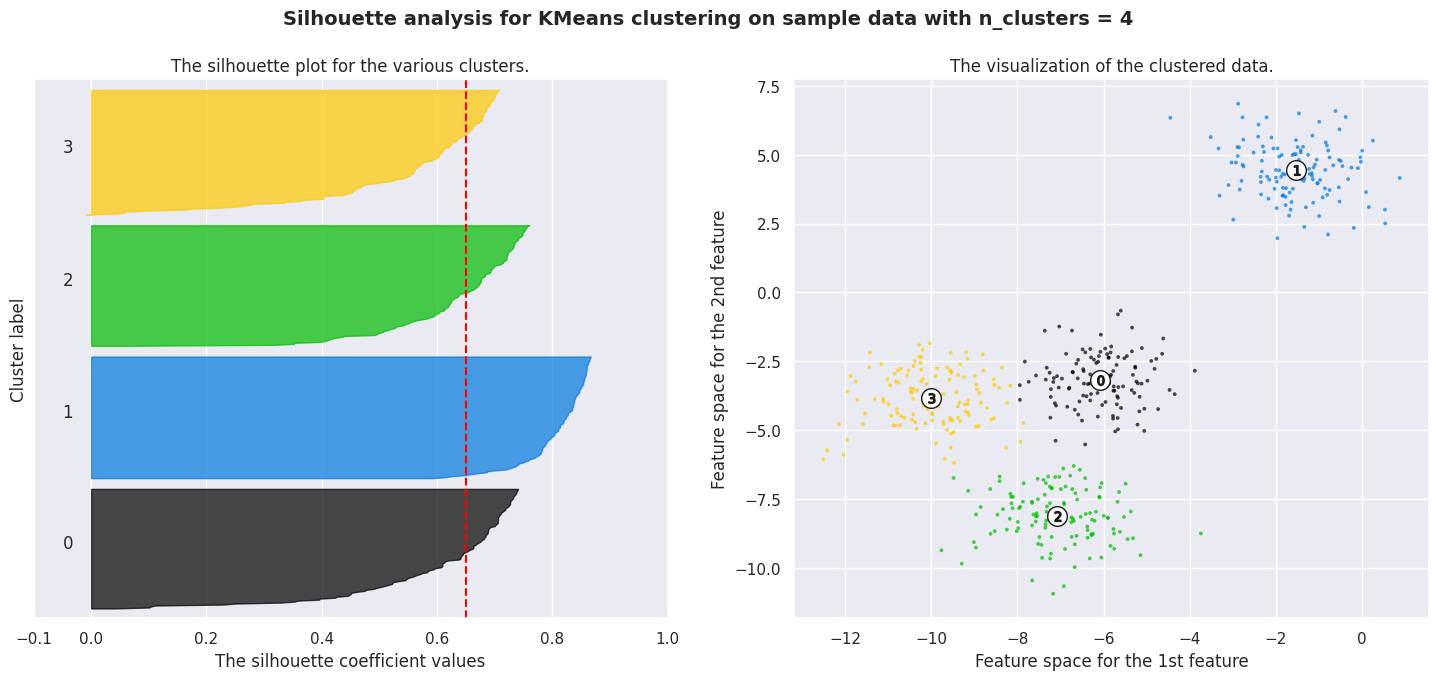

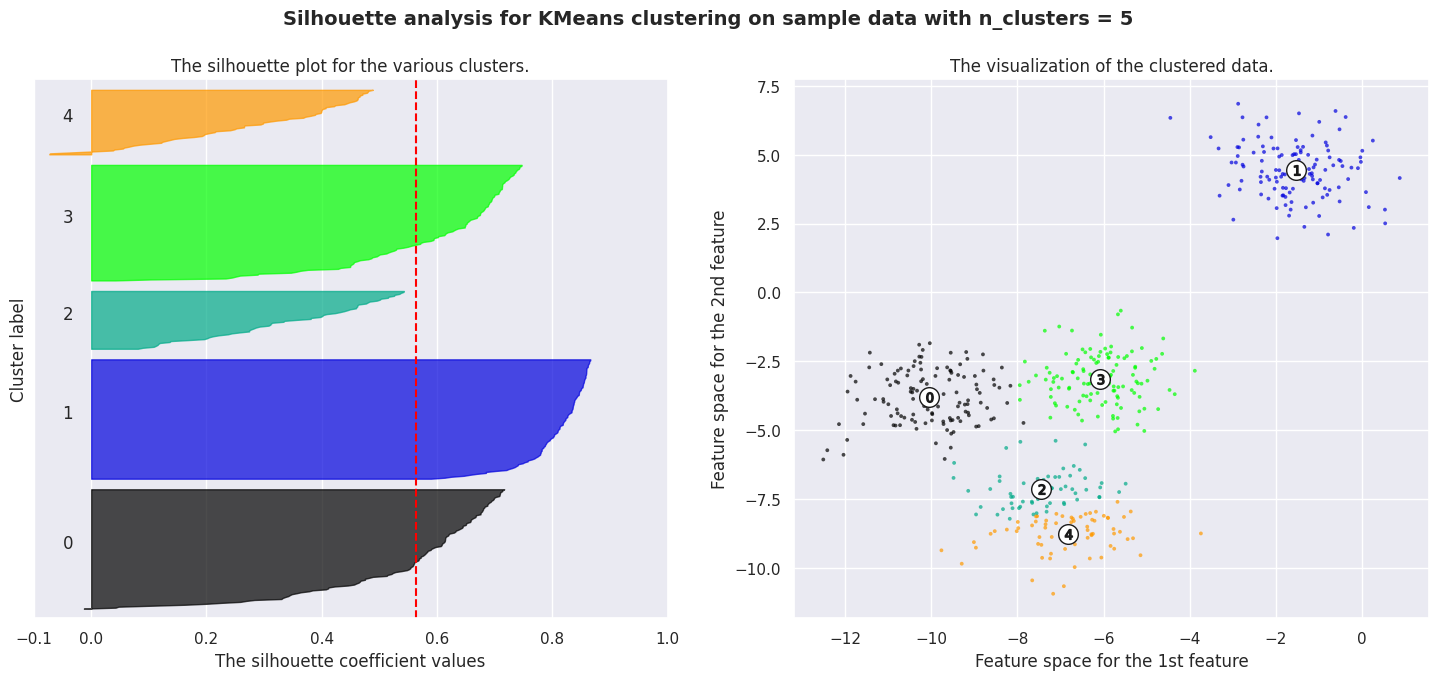

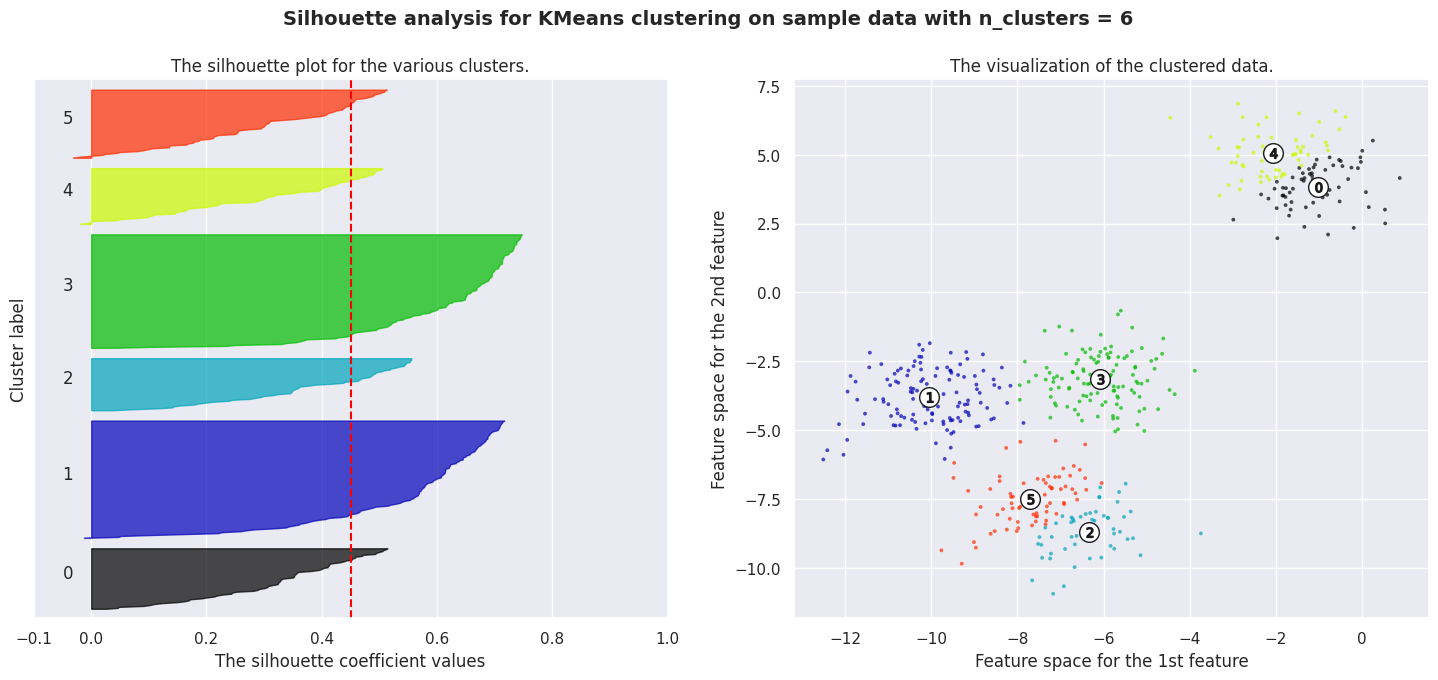

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

Em geral, estamos buscando um valor de $k$ que gere um agrupamente cujos valores das silhuetas dos pontos sejam maior que a média geral para uma grande parte dos pontos de cada *cluster*.

### Exemplo II: Escolhendo o número de grupos para o Agrupamento Espectral

Por fim, vamos utilizar a medida *eigengap* para motivar a escolha de um bom número de grupos para o agrupamento espectral.

Vamos utilizar o mesmo conjunto de dados do exemplo anterior.

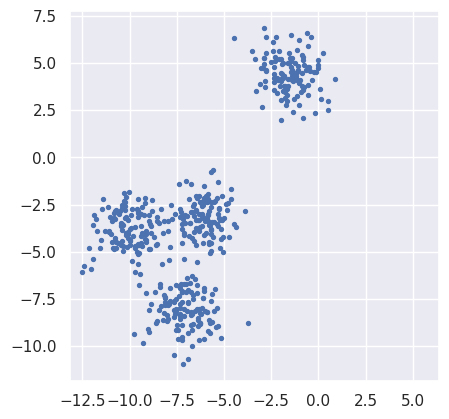

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 8)
plt.axis('square');

Infelizmente, *eigengap* não está implementada na ``scikit-learn``.

**WARNING:** o código abaixo só serve para a chamada do método espectral com parâmetros:
- ``affinity = 'nearest_neighbors'``
- ``n_neighbors = 10``. Caso modifique esse valor, deve ser modificado no código abaixo também.
- ``n_clusters`` livre para escolha.
Os demais parâmetros não devem ser modificados.

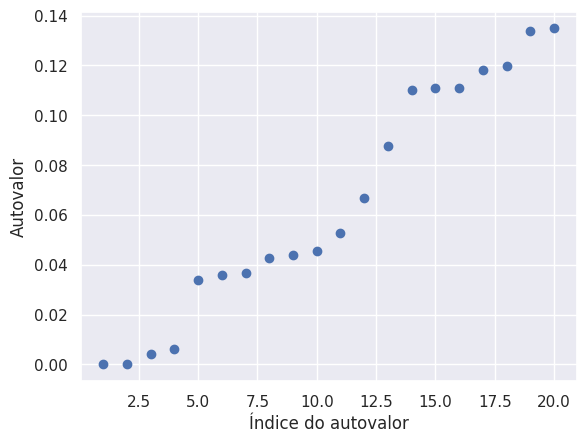

In [ ]:
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csgraph
from numpy import linalg as LA

# 1 Construindo a matriz de adjacências do grafo de vizinhos mais próximos.
G = kneighbors_graph(X, n_neighbors = 10, include_self = True)
A = 0.5 * (G + G.T)

# 2 Construindo a Laplaciana Normalizada
L = csgraph.laplacian(A, normed = True).todense()

# 3 Obtendo os autovalores da Laplaciana Normalizada
# Valores já estão ordenados em ordem crescente.
values, _ = LA.eigh(L)

# 4 Plotando os valores dos 'gaps' e escolhendo um k adequado.
plt.scatter([i for i in range(1, 21)], values[:20])
plt.xlabel('Índice do autovalor')
plt.ylabel('Autovalor');

O Gráfico acima indica que $k = 4$ é uma boa escolha para o número de grupos. Veja que o *eigengap* para este valor é significativamente maior que para os demais.

# What is next?

- Praticar!